In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df_dementia =pd.read_csv(r'C:\Users\nitin\OneDrive\Desktop\dav\dementia_dataset.csv')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_dementia

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [6]:
df_dementia=df_dementia.replace('Nondemented', 0).replace('Demented', 1).replace('Converted',2)

In [8]:
df_dementia.isna().any()

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
M/F           False
Hand          False
Age           False
EDUC          False
SES           False
MMSE          False
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool

In [7]:
df_dementia['MMSE'] = df_dementia['MMSE'].fillna(df_dementia['MMSE'].mode()[0])
df_dementia['SES'] = df_dementia['SES'].fillna(df_dementia['SES'].mode()[0])

In [9]:
df_dementia.isna().any()

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
M/F           False
Hand          False
Age           False
EDUC          False
SES           False
MMSE          False
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool

In [10]:
df_dementia_new=df_dementia.drop(['Subject ID', 'MRI ID'], axis=1)

In [12]:
df_dementia_new

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [13]:
df_dementia_new= pd.get_dummies(df_dementia_new)

In [14]:
df_dementia_new

,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_F,M/F_M,Hand_R
0,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,False,True,True
1,0,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876,False,True,True
2,1,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046,False,True,True
3,1,2,560,76,12,2.0,28.0,0.5,1738,0.713,1.010,False,True,True
4,1,3,1895,80,12,2.0,22.0,0.5,1698,0.701,1.034,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,842,82,16,1.0,28.0,0.5,1693,0.694,1.037,False,True,True
369,1,3,2297,86,16,1.0,26.0,0.5,1688,0.675,1.040,False,True,True
370,0,1,0,61,13,2.0,30.0,0.0,1319,0.801,1.331,True,False,True
371,0,2,763,63,13,2.0,30.0,0.0,1327,0.796,1.323,True,False,True


In [16]:
pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.8 MB 2.8 MB/s eta 0:00:03
   -------- ------------------------------- 1.6/7.8 MB 2.5 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/7.8 MB 2.4 MB/s eta 0:00:03
   ------------ --------------------------- 2.4/7.8 MB 2.1 MB/s eta 0:00:03
   ------------ --------------------------- 2.4/7.8 MB 2.1 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/7.8 MB 1.9 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/7.8 MB 1.8 MB/s eta 0:00:03
   ---------------- ----------------------- 3.1/7.8 MB 1.8 MB/s eta 0:00:03
   ----------------- ---------------------- 3.4/7.8 MB 1.7 MB/s eta 0:00:03
   -------------------- ------------------- 3.9/7.8 MB 1.7 MB/s eta 0:00:03
   --------------------- -

In [18]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

MR Delay - the number of days since the patient last visited the doctor.
SES - socio-economic status.
MMSE - scores from the Mini-Mental State Examination (a test for cognitive abilities).
CDR - Clinical Dementia Rating (a measure of dementia severity).
eTIV - estimated total intracranial volume.
nWBV - normalized brain volume.
ASF - atlas-based method for normalizing head size to measure standardized total intracranial volume for comparison, classification, and prediction.

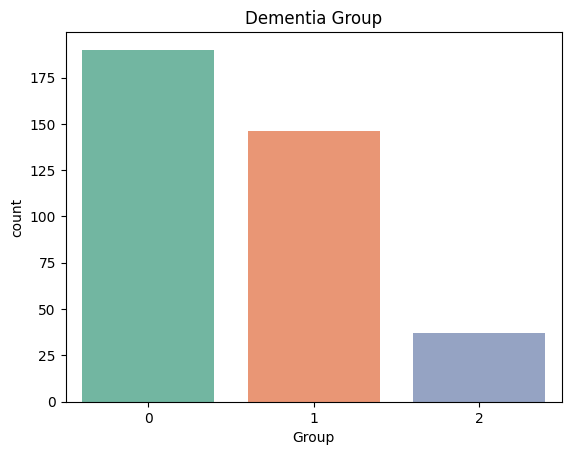

In [27]:
# Creating a count plot with 'Group' on the x-axis
sns.countplot(data=df_dementia, x='Group', palette='Set2').set(title = 'Dementia Group');

In [31]:
df_dementia.rename(columns={'M/F': 'Gender'}, inplace=True)

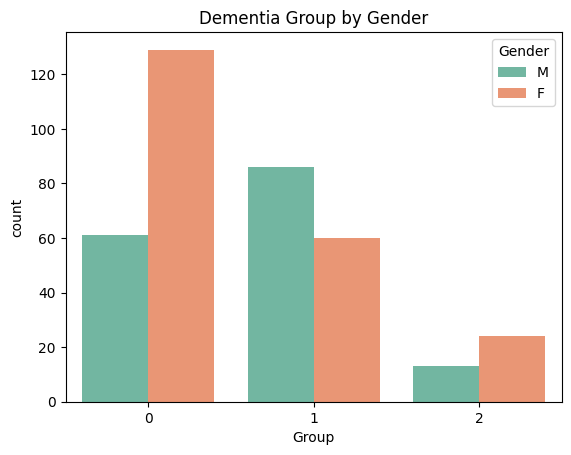

In [32]:
# Visualizing the distribution of 'Group' by 'Gender' using a count plot
sns.countplot(data=df_dementia, x='Group', palette='Set2', hue='Gender').set(title = 'Dementia Group by Gender');

<Axes: >

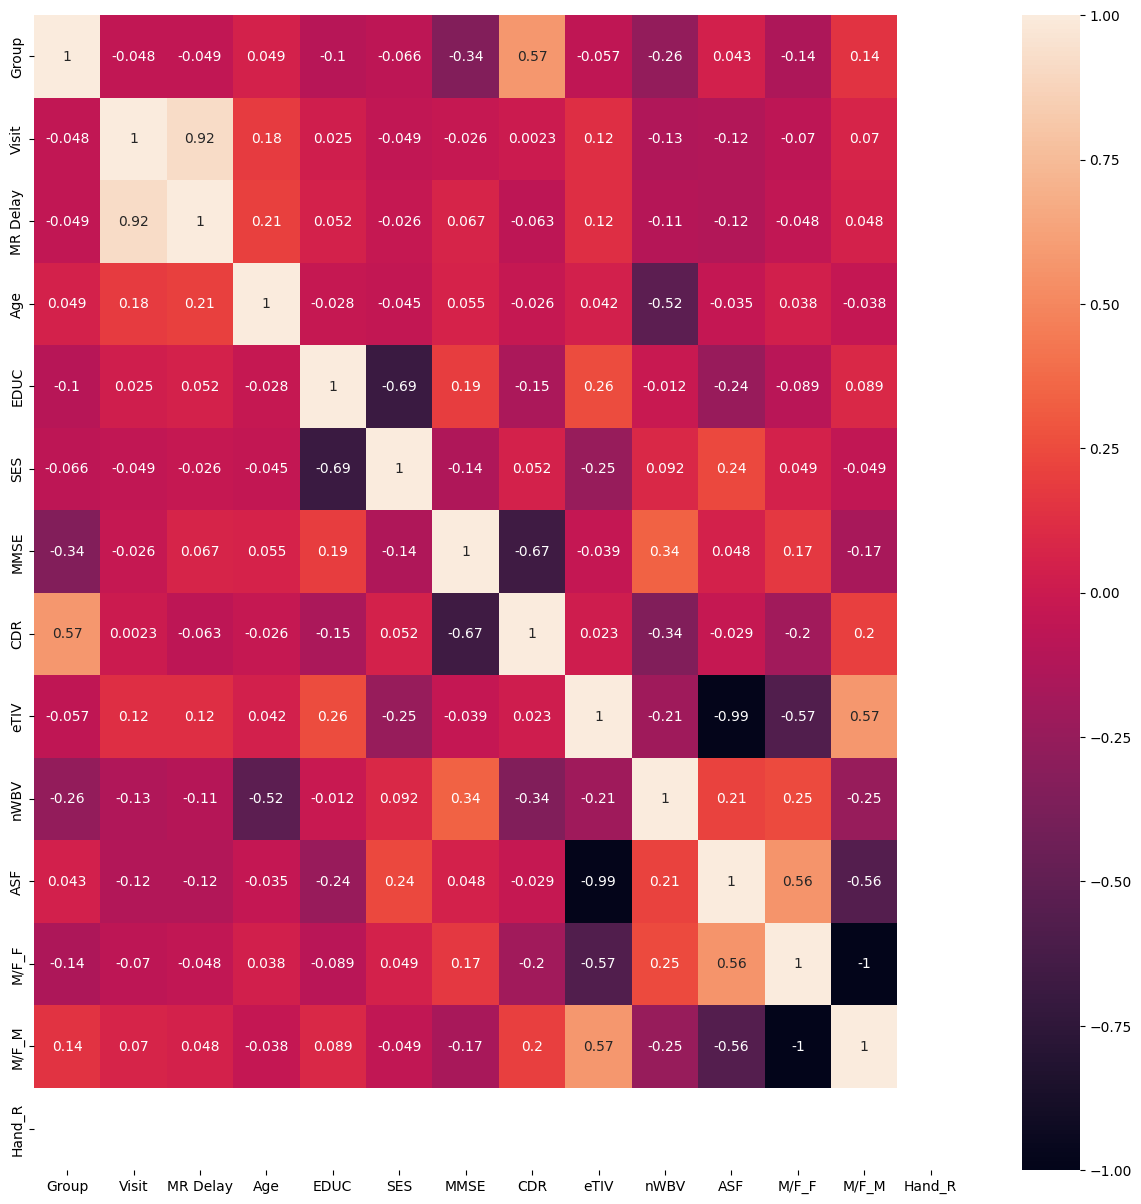

In [20]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_dementia_new.corr(),annot=True)

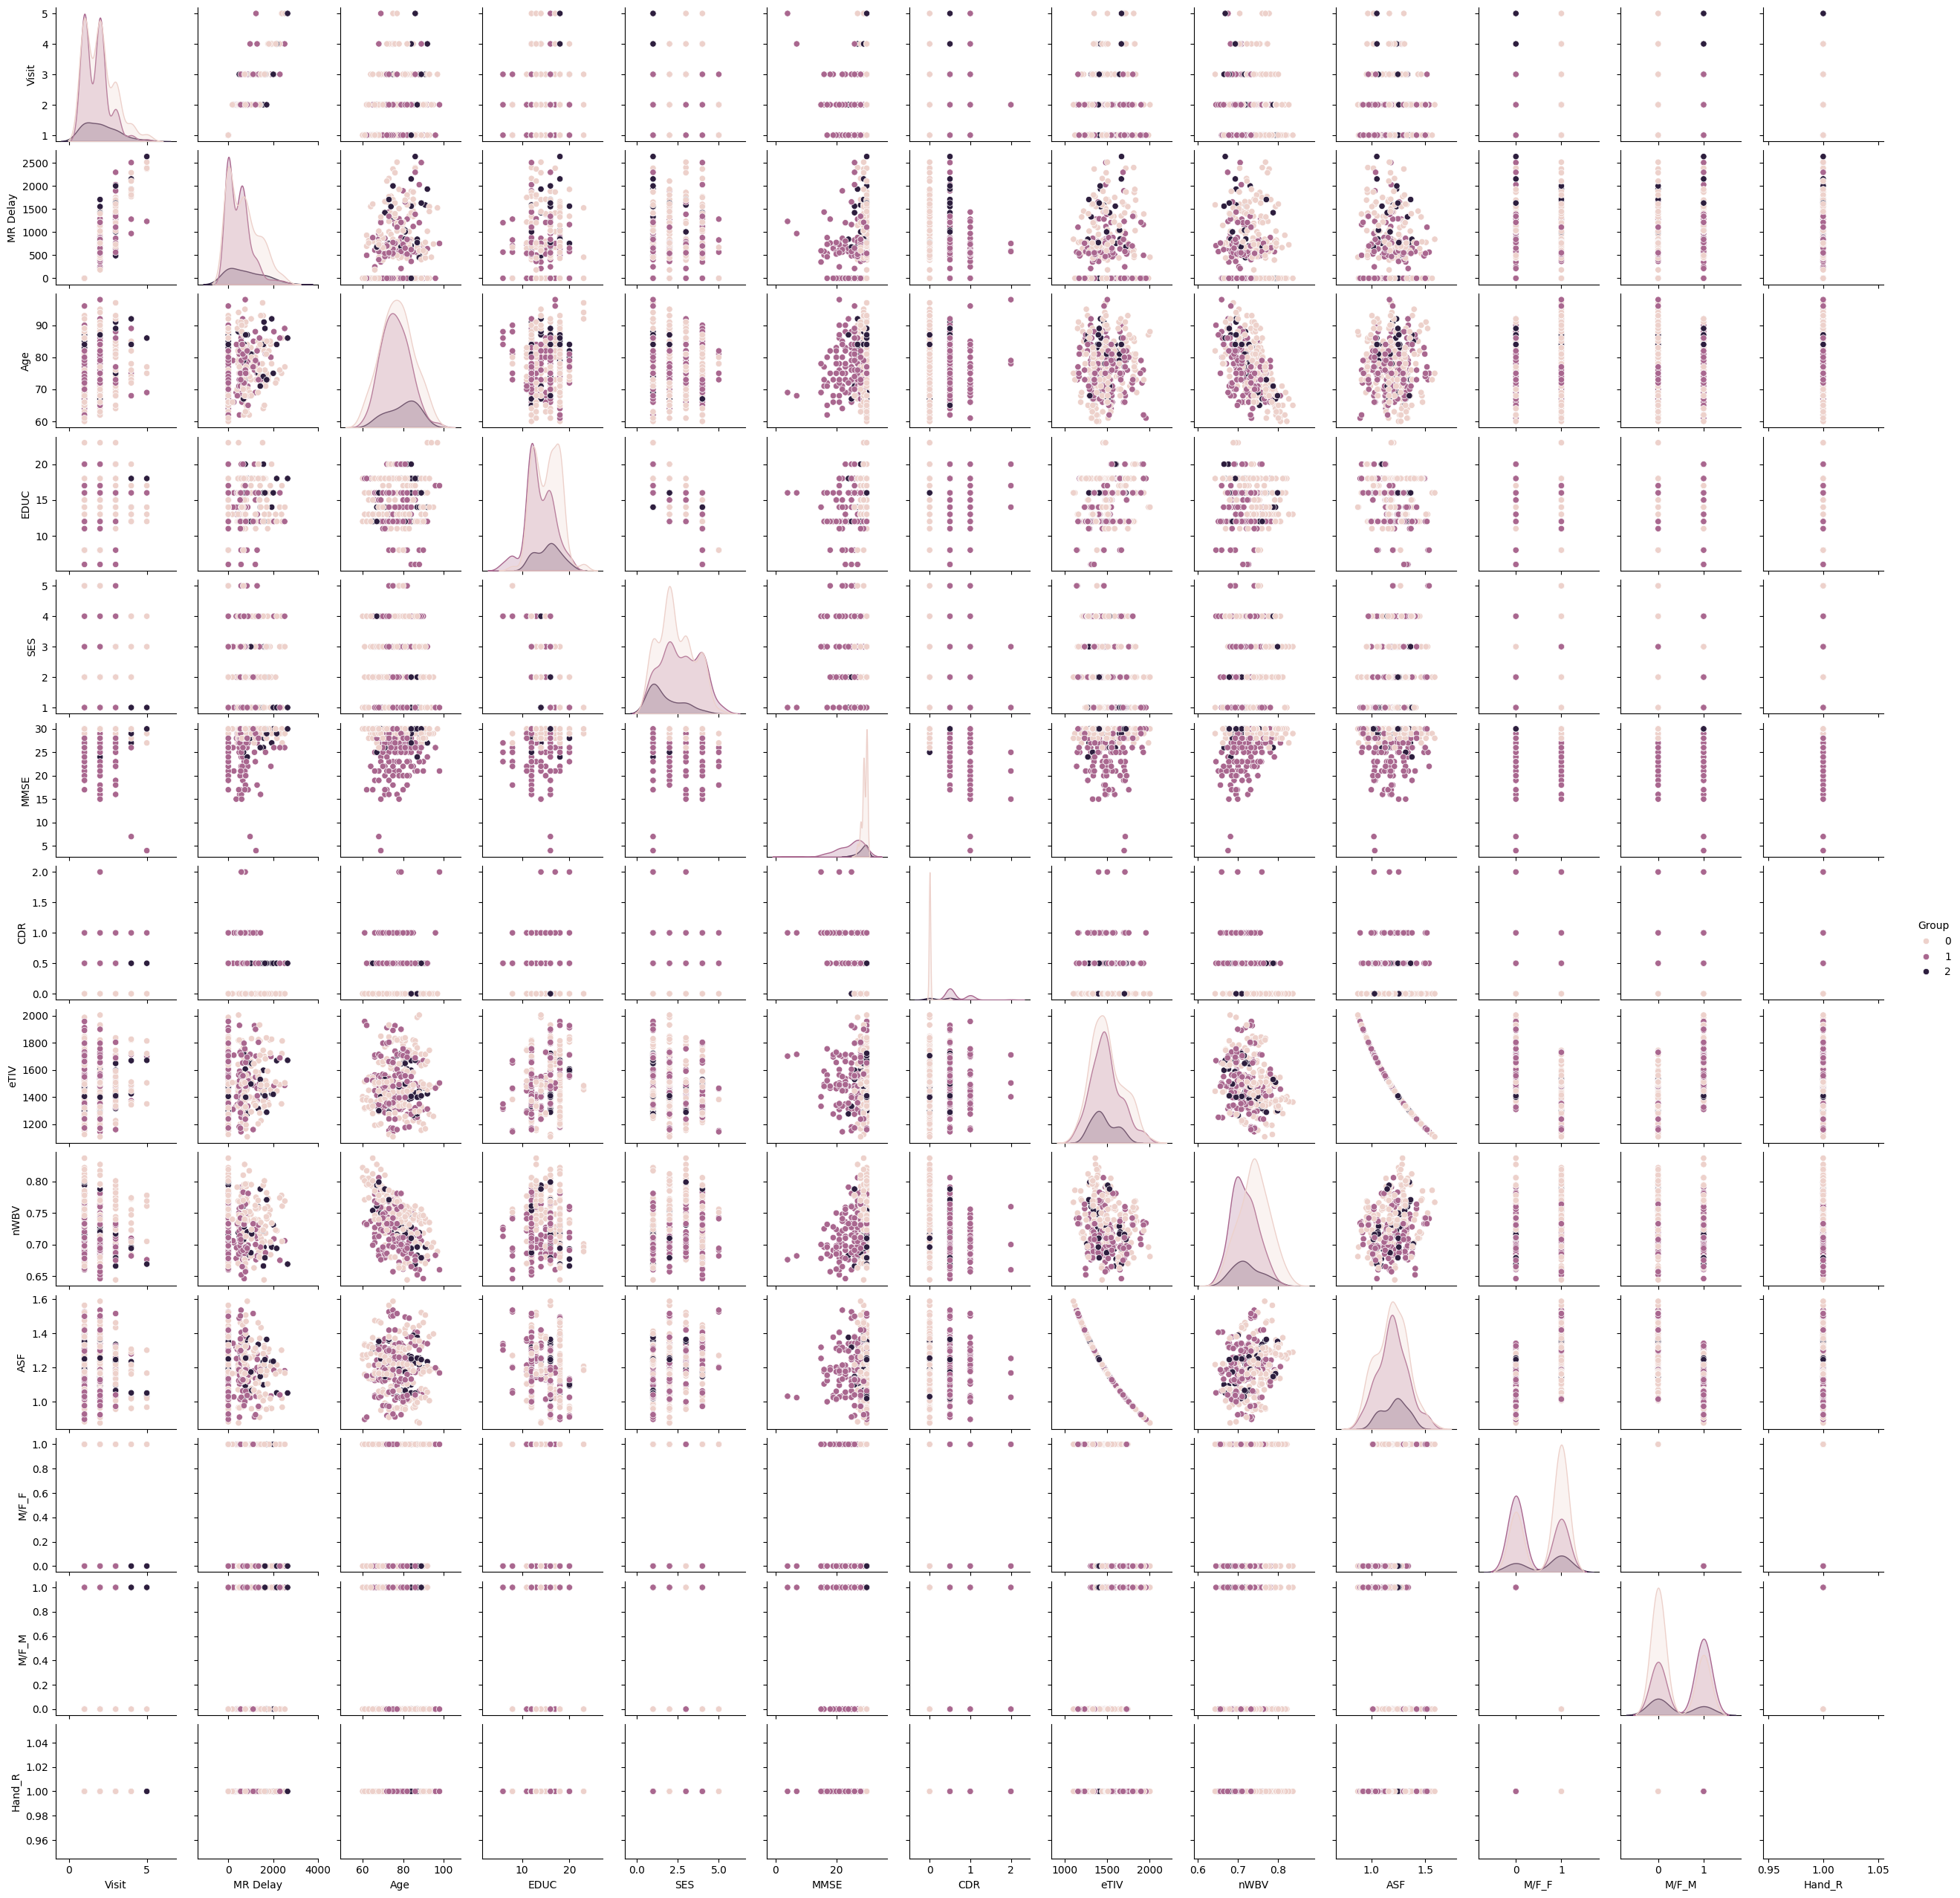

In [21]:
sns.pairplot(df_dementia_new,hue='Group',size=2)

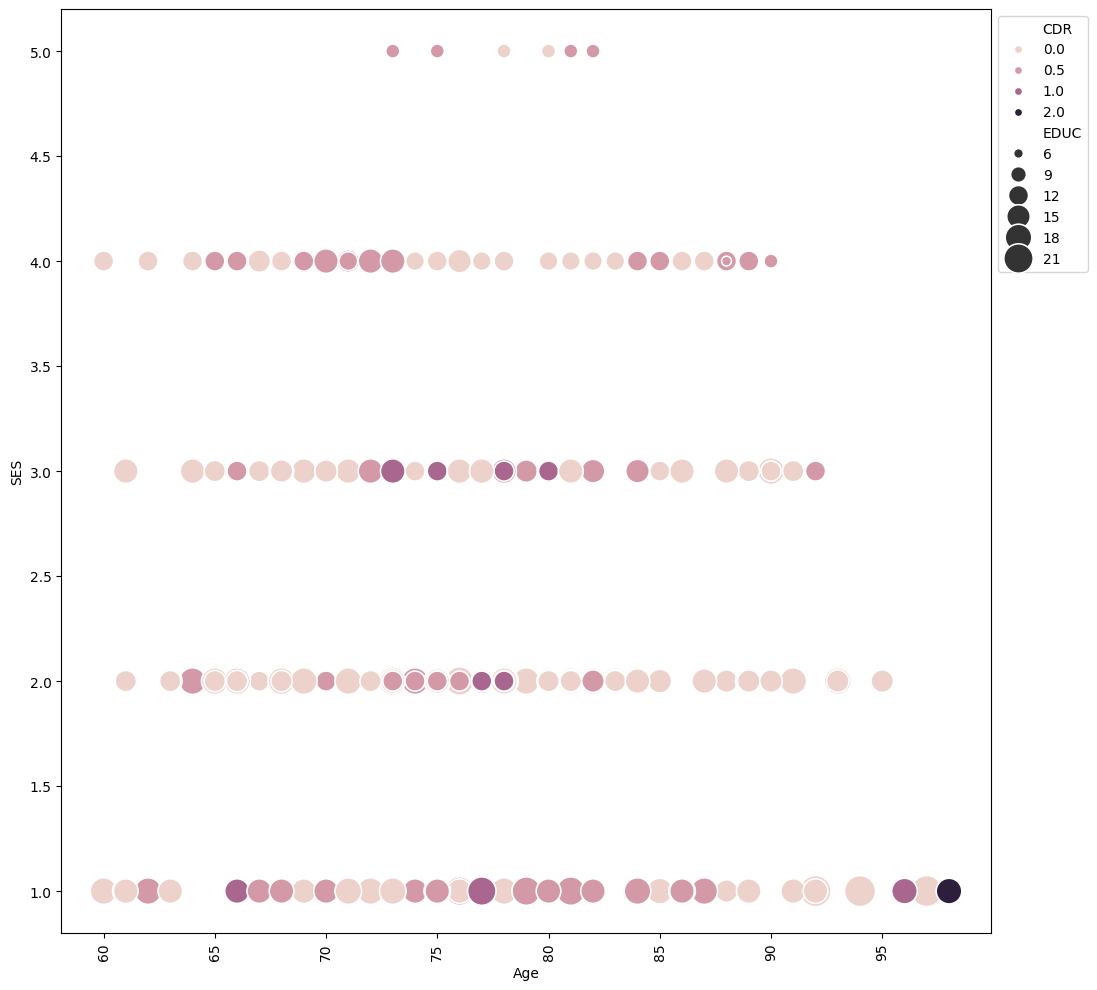

In [22]:
plt.figure(figsize=(12, 12))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df_dementia_new['Age'],y=df_dementia_new['SES'],hue=df_dementia_new['CDR'],size=df_dementia_new['EDUC'],data=df_dementia_new,sizes=(50,500))
plt.setp(ax.get_xticklabels(), rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

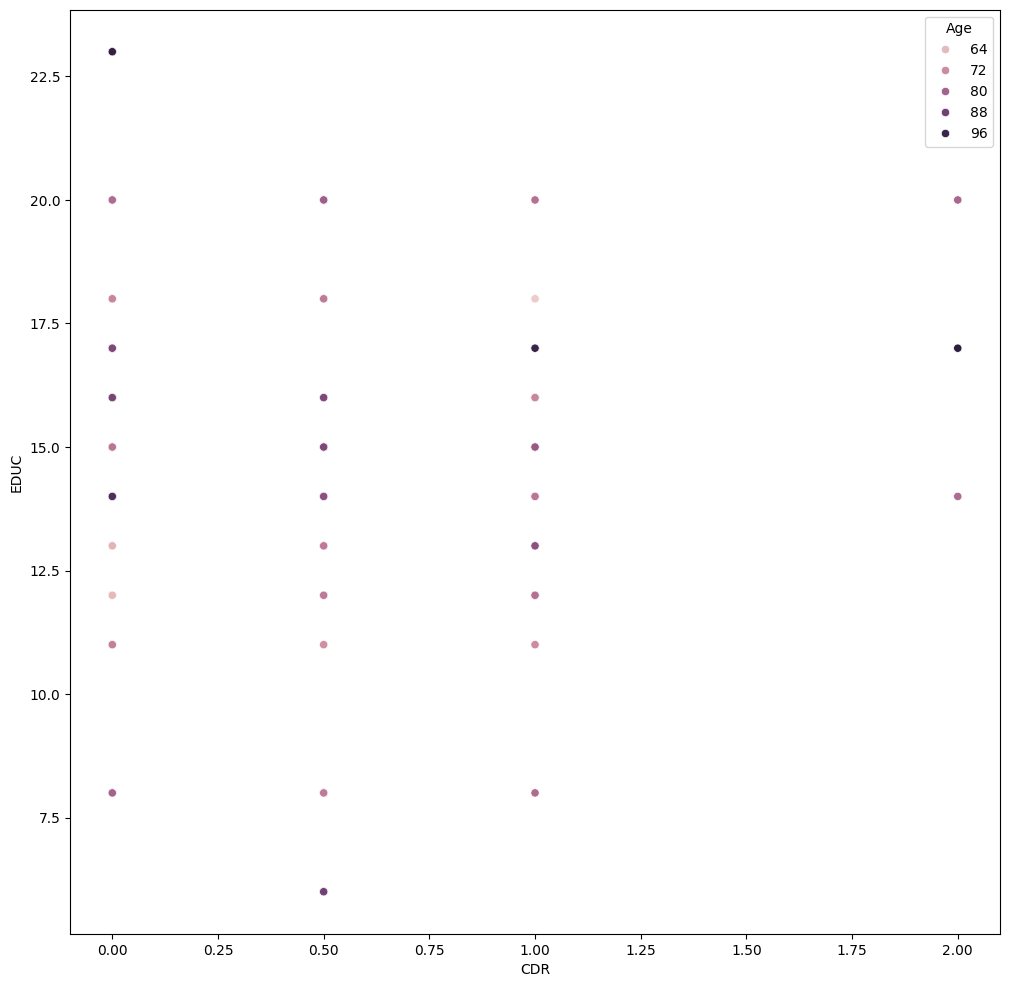

In [23]:
plt.figure(figsize=(12, 12))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df_dementia_new['CDR'], y=df_dementia_new['EDUC'], hue=df_dementia_new['Age'])
plt.show()
plt.setp(ax.get_xticklabels(), rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

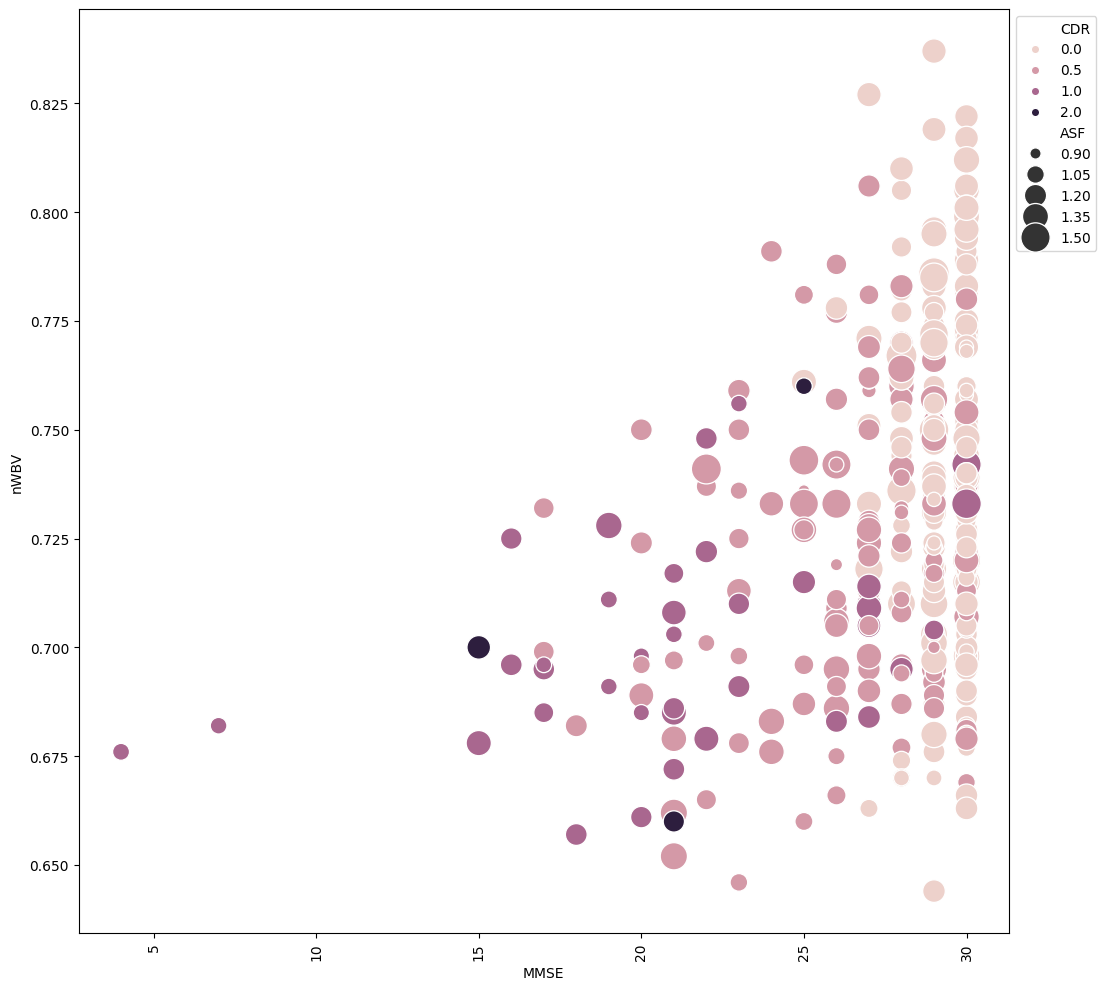

In [24]:
plt.figure(figsize=(12, 12))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df_dementia_new['MMSE'],y=df_dementia_new['nWBV'],hue=df_dementia_new['CDR'],size=df_dementia_new['ASF'],data=df_dementia_new,sizes=(50,500))
plt.setp(ax.get_xticklabels(), rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

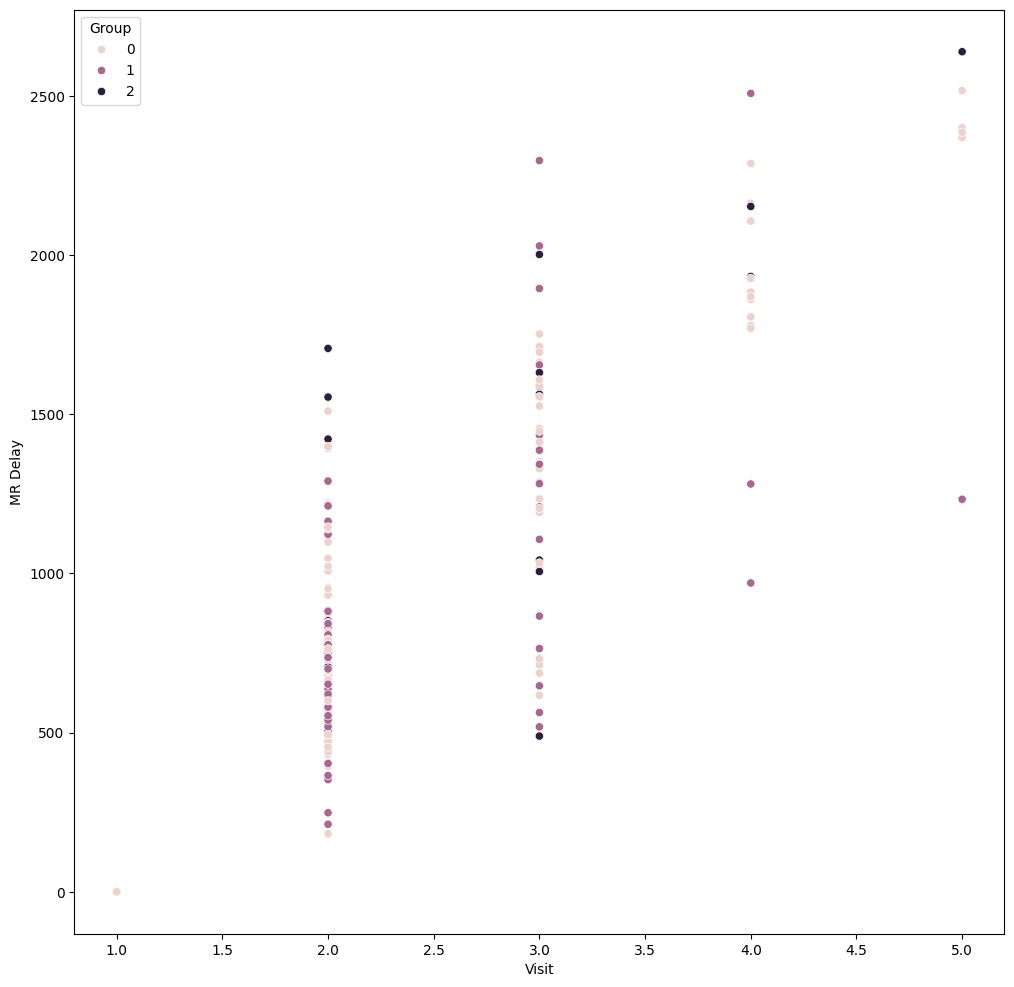

In [25]:
plt.figure(figsize=(12, 12))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df_dementia_new['Visit'], y=df_dementia_new['MR Delay'], hue=df_dementia_new['Group'])
plt.show()
plt.setp(ax.get_xticklabels(), rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

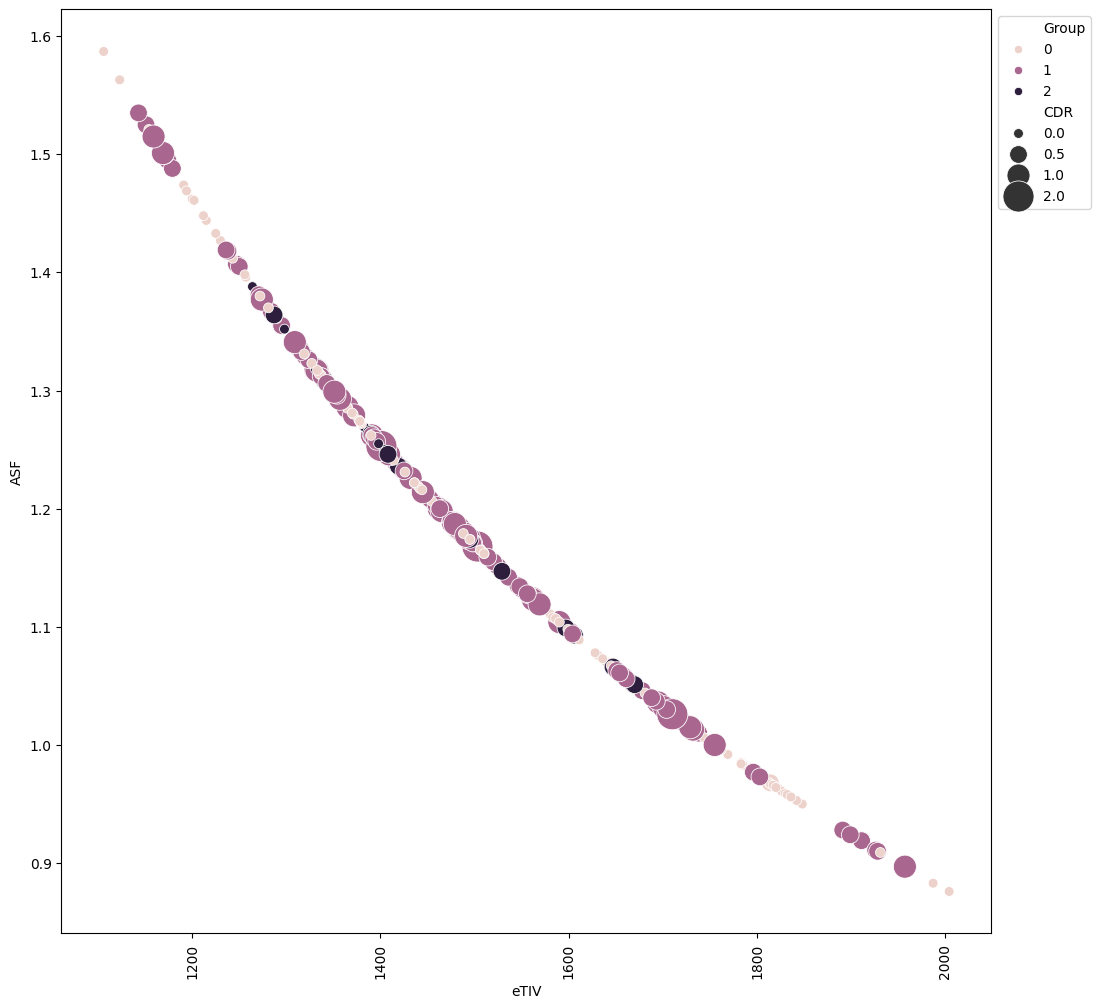

In [26]:
plt.figure(figsize=(12, 12))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df_dementia_new['eTIV'],y=df_dementia_new['ASF'],hue=df_dementia_new['Group'],size=df_dementia_new['CDR'],data=df_dementia_new,sizes=(50,500))
plt.setp(ax.get_xticklabels(), rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))